# Import and Dataset

In [184]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [185]:
df = pd.read_csv(r'Sport car price.csv')

In [186]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [188]:
# convert datatypes
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [189]:
df.shape

(1007, 8)

In [190]:
# Clean and preprocess data
# Remove commas and convert 'Price (in USD)' to numeric
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Convert 'Horsepower', 'Torque (lb-ft)', and '0-60 MPH Time (seconds)' to numeric
for column in ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle 'Engine Size (L)'
# Create a column for hybrids: flag rows with '+' in the value or containing 'Hybrid'
df['Hybrid'] = df['Engine Size (L)'].str.contains(r'\+|Hybrid', case=False, na=False)

# Create a column for electric vehicles: flag rows containing 'Electric'
df['Electric'] = df['Engine Size (L)'].str.contains('Electric', case=False, na=False)

# Replace invalid entries in 'Engine Size (L)' with NaN, then extract and convert numeric parts
df['Engine Size (L)'] = pd.to_numeric(
    df['Engine Size (L)'].str.extract(r'([\d.]+)')[0], errors='coerce'
)


# Handle missing values (e.g., fill missing 'Engine Size (L)' with 0 or other strategies)
df['Engine Size (L)'] = df['Engine Size (L)'].fillna(0)  # Default to 0 for missing engine sizes
df



,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
0,Porsche,911,2022,3.0,379.0,331.0,4.00,101200.0,False,False
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390.0,False,False
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750.0,False,False
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700.0,False,False
4,McLaren,720S,2021,4.0,710.0,568.0,2.70,298000.0,False,False
...,...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1106.0,2.50,3000000.0,False,False
1003,Lotus,Evija,2021,0.0,1972.0,1254.0,2.00,2000000.0,False,True
1004,McLaren,Senna,2021,4.0,789.0,590.0,2.70,1000000.0,False,False
1005,Pagani,Huayra,2021,6.0,764.0,738.0,3.00,2600000.0,False,False


In [191]:
#Display the hybrid column is true and get the rows that are true
df[df['Hybrid'] == True]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
42,BMW,i8,2020,1.5,369.0,420.0,4.2,148500.0,True,True
626,Porsche,Panamera Turbo S E-Hybrid,2021,4.0,690.0,641.0,3.0,186350.0,True,False
732,BMW,i8,2022,0.0,369.0,184.0,4.2,148500.0,True,False
855,Ferrari,SF90 Stradale,2021,4.0,986.0,590.0,2.5,625000.0,True,False
967,Porsche,Panamera Turbo S E-Hybrid,2021,0.0,689.0,642.0,3.0,190000.0,True,False


In [192]:
df.shape

(1007, 10)

In [197]:
# diplay all the cars years that are less than 1980 and electric
df[(df['Year'] < 1980) & (df['Electric'] == False)]


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
170,Shelby,Cobra,1965,7.0,435.0,440.0,4.2,1000000.0,False,False


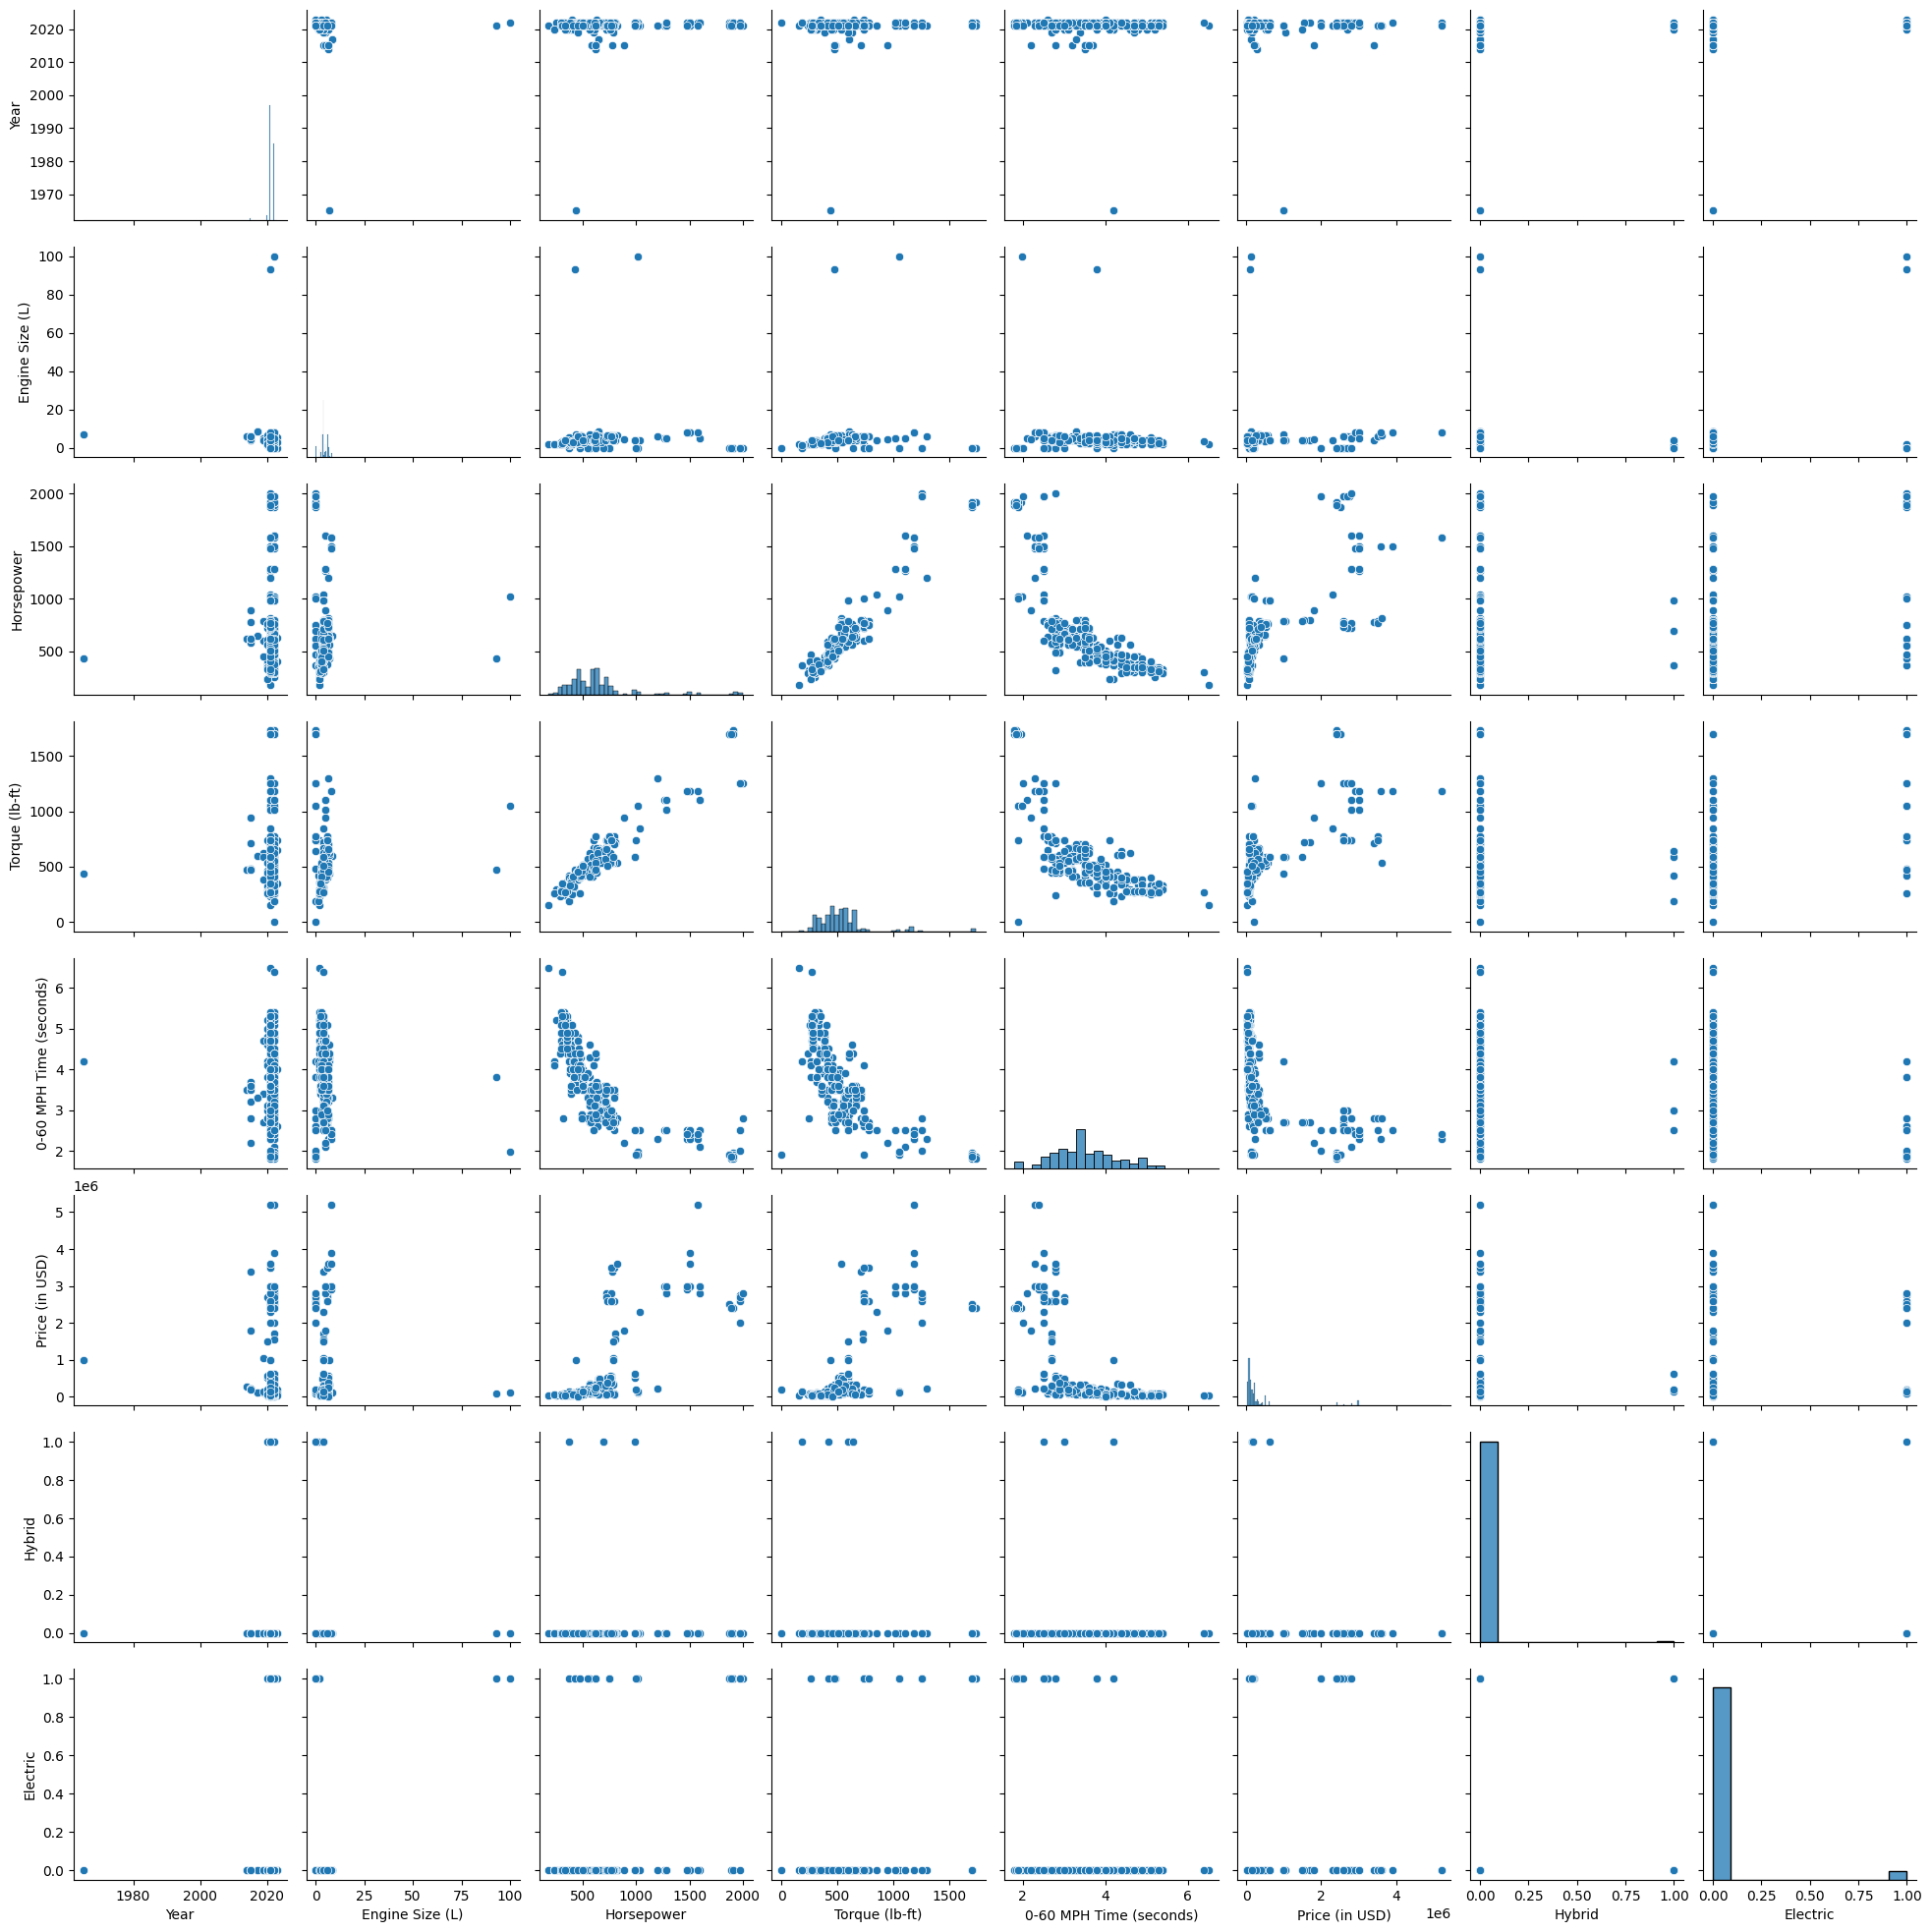

In [193]:
#Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


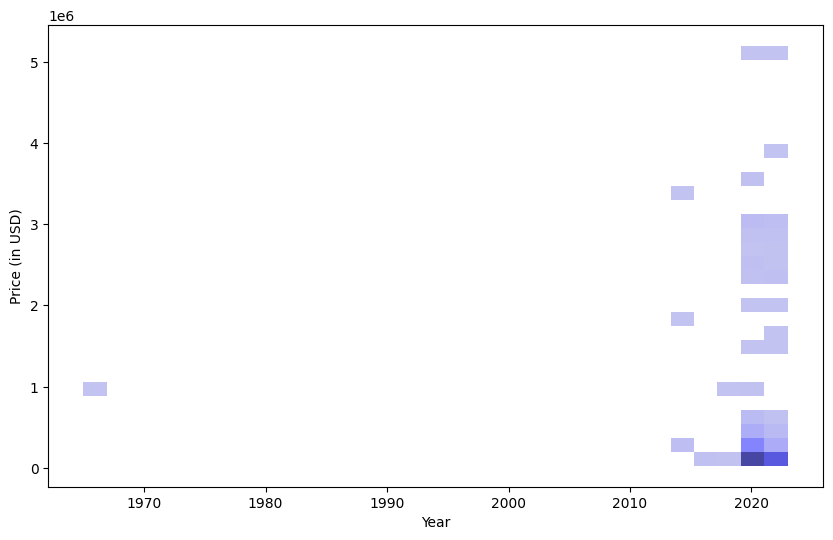

In [201]:
#create a hist plot for the price vs year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', y='Price (in USD)', bins=30, color='blue', kde=True)
plt.show()


In [194]:
# Define features (X) and target (y)
X = df.drop('Price (in USD)', axis=1)
y = df['Price (in USD)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

ValueError: could not convert string to float: 'Porsche'

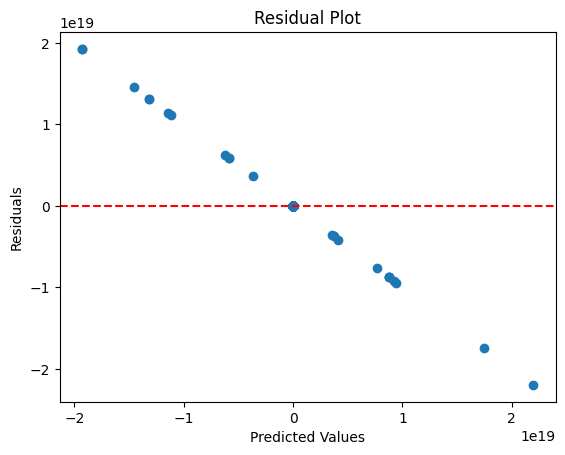

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
